# Exporation & cleaning dataset



## Prestazioni ambulatoriali Lombardia
Descrizione colonne: https://github.com/SimoneFarallo/public_and_social_services/blob/main/dataset/prest_amb_documentation.pdf


In [3]:
pip  install --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'c:\Users\Simone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
prest_amb = pd.read_csv('https://raw.githubusercontent.com/SimoneFarallo/public_and_social_services/main/dataset/prest_amb.csv')
prest_amb.head()

,ANNO_RIF,COD_ASL,ASL,COD_ENTE,ENTE,COD_STRUT,STRUT,TIPO_RAP_SSN,INDIRIZZO,COMUNE_STRUT,...,TIPO_PREST,ATTIVITA,COD_BRANCA_MINSLE,BRANCA_MINSLE,COD_BRANCA_REGLE,BRANCA_REGLE,COD_PREST_AMBLE,PREST_AMBLE,TARIFFA_PREST_EURO,N_PREST
0,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,705,ASST OVEST MILANESE,2340,POLIAMBULATORIALE PARABIAGO,PUBBLICO ACCREDITATO,VIA XI FEBBRAIO N. 31,PARABIAGO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",112,CHIMICA CLINICA,90115,CALCITONINA,N.T.,17,260.1
1,2020,323,ATS DELLA MONTAGNA,713,ASST DELLA VALTELLINA E DELL'ALTO LARIO,2941,POLIAMBULATORIO OSP. MORBEGNO,PUBBLICO ACCREDITATO,VIA MORELLI 1,MORBEGNO,...,ATT. CLINICA,19,ORTOPEDIA E TRAUMATOLOGIA,191,ORTOPEDIA E TRAUMATOLOGIA,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,N.T.,14,162.4
2,2020,327,ATS DELLA VAL PADANA,724,ASST DI CREMONA,3397,POLIAMB. A.O.IST.OSPIT.CREMONA,PUBBLICO ACCREDITATO,VIA LARGO PRIORI N.1,CREMONA,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,N.T.,453,2627.4
3,2020,328,ATS DI PAVIA,938,FOND. CLINICA DEL LAVORO - PAVIA,2112,POLIAMB. IRCCS MAUGERI,PRIVATO ACCREDITATO,"VIA MAUGERI, 10",PAVIA,...,ATT. CLINICA,22,PNEUMOLOGIA,221,PNEUMOLOGIA,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,N.T.,56,532.0
4,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,707,ASST NORD MILANO,30058,OSPEDALE BASSINI - CINISELLO BALSAMO,PUBBLICO ACCREDITATO,VIA GORKI 50,CINISELLO BALSAMO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,90557,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,N.T.,2,40.0


In [6]:
prest_amb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160891 entries, 0 to 160890
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ANNO_RIF            160891 non-null  int64  
 1   COD_ASL             160891 non-null  int64  
 2   ASL                 160891 non-null  object 
 3   COD_ENTE            160891 non-null  int64  
 4   ENTE                160891 non-null  object 
 5   COD_STRUT           160891 non-null  int64  
 6   STRUT               160891 non-null  object 
 7   TIPO_RAP_SSN        160891 non-null  object 
 8   INDIRIZZO           160891 non-null  object 
 9   COMUNE_STRUT        160891 non-null  object 
 10  PROV_STRUT          160891 non-null  object 
 11  NUM_TEL             160891 non-null  object 
 12  TIPO_PREST          160891 non-null  object 
 13  ATTIVITA            160891 non-null  int64  
 14  COD_BRANCA_MINSLE   160891 non-null  object 
 15  BRANCA_MINSLE       160891 non-nul

In [24]:
import pandas as pd

def contatore(dataset):
    """
    Conta il numero di duplicati, valori nulli e valori unici per ogni colonna di un dataset.
    
    :param dataset: Il dataset da analizzare (pandas DataFrame).
    :return: Un dizionario contenente i risultati per ogni colonna.
    """
    risultati = {}
    for colonna in dataset.columns:
        duplicati = dataset.duplicated(subset=colonna).sum()
        nulli = dataset[colonna].isnull().sum()
        unici = dataset[colonna].nunique()
        risultati[colonna] = {
            'duplicati': duplicati,
            'nulli': nulli,
            'unici': unici
        }
    return risultati

In [8]:
contatore(prest_amb)

{'ANNO_RIF': {'duplicati': 160890, 'nulli': 0, 'unici': 1},
 'COD_ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'COD_ENTE': {'duplicati': 160830, 'nulli': 0, 'unici': 61},
 'ENTE': {'duplicati': 160830, 'nulli': 0, 'unici': 61},
 'COD_STRUT': {'duplicati': 159790, 'nulli': 0, 'unici': 1101},
 'STRUT': {'duplicati': 159827, 'nulli': 0, 'unici': 1064},
 'TIPO_RAP_SSN': {'duplicati': 160889, 'nulli': 0, 'unici': 2},
 'INDIRIZZO': {'duplicati': 159935, 'nulli': 0, 'unici': 956},
 'COMUNE_STRUT': {'duplicati': 160618, 'nulli': 0, 'unici': 273},
 'PROV_STRUT': {'duplicati': 160879, 'nulli': 0, 'unici': 12},
 'NUM_TEL': {'duplicati': 160887, 'nulli': 0, 'unici': 4},
 'TIPO_PREST': {'duplicati': 160888, 'nulli': 0, 'unici': 3},
 'ATTIVITA': {'duplicati': 160864, 'nulli': 0, 'unici': 27},
 'COD_BRANCA_MINSLE': {'duplicati': 160864, 'nulli': 0, 'unici': 27},
 'BRANCA_MINSLE': {'duplicati': 160845, 'nulli': 0, 'unici': 46},
 'COD_BRAN

In [9]:
#Elimino le colonne che non mi servono
prest_amb = prest_amb.drop(['ANNO_RIF', 'ATTIVITA', 'NUM_TEL', 'PREST_AMBLE'],axis = 1)
prest_amb.columns

Index(['COD_ASL', 'ASL', 'COD_ENTE', 'ENTE', 'COD_STRUT', 'STRUT',
       'TIPO_RAP_SSN', 'INDIRIZZO', 'COMUNE_STRUT', 'PROV_STRUT', 'TIPO_PREST',
       'COD_BRANCA_MINSLE', 'BRANCA_MINSLE', 'COD_BRANCA_REGLE',
       'BRANCA_REGLE', 'COD_PREST_AMBLE', 'TARIFFA_PREST_EURO', 'N_PREST'],
      dtype='object')

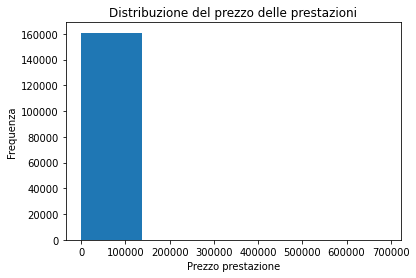

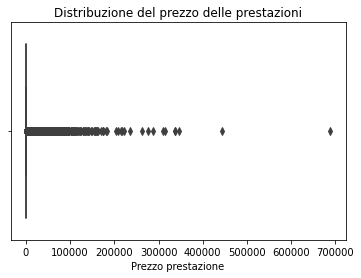

In [10]:
#Analizzo la colonna del prezzo
plt.hist(prest_amb['TARIFFA_PREST_EURO'], bins=5)
plt.xlabel('Prezzo prestazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione del prezzo delle prestazioni')
plt.show()



sns.boxplot(x=prest_amb['TARIFFA_PREST_EURO'])
plt.xlabel('Prezzo prestazione')
plt.title('Distribuzione del prezzo delle prestazioni')
plt.show()

In [11]:
#Non riesco a capire i prezzi, sulla documentazione c'è scritto in euro, ma ci sono valori senza senso, preferiamo elimnare la colonna e trovare un altro prezziario
prest_amb = prest_amb.drop(['TARIFFA_PREST_EURO'],axis = 1)
prest_amb.columns


Index(['COD_ASL', 'ASL', 'COD_ENTE', 'ENTE', 'COD_STRUT', 'STRUT',
       'TIPO_RAP_SSN', 'INDIRIZZO', 'COMUNE_STRUT', 'PROV_STRUT', 'TIPO_PREST',
       'COD_BRANCA_MINSLE', 'BRANCA_MINSLE', 'COD_BRANCA_REGLE',
       'BRANCA_REGLE', 'COD_PREST_AMBLE', 'N_PREST'],
      dtype='object')

In [12]:
#salvare il file
#prest_amb.to_csv('prest_amb_clean.csv', index=False)


## Nomenclatatura & Prezziaro Marche

Fonte: http://goodpa.regione.marche.it/lv/dataset/catalogo-regionale-delle-prestazioni-sanitarie-ambulatoriali/resource/ffc6609e-2a28-4ecd-bf80-5992d5981593?inner_span=True

In [13]:
catalogo_marche = pd.read_excel('https://raw.githubusercontent.com/SimoneFarallo/public_and_social_services/main/dataset/unionecatalogonomenclatore.xlsx')
catalogo_marche.head()

,COD_PRST,DESC_PRST,DESC_FULL,DM,FLAG_PNGLA,DISCIPLINA,DISCIPLINA2,DISCIPLINA3,DISCIPLINA4,DATA_INIZIO_VALIDITA,...,AGGR_L4,BRANCA1,BRANCA2,BRANCA3,NOTE,ALTRE_NOTE,DATA_INIZIO_VALIDITA.1,DATA_FINE_VALIDITA.1,E_DOPO.1,DATA_FINE_PRESCRIVIBILITA
0,10010,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,03.8,NaN,NaN,NaN,NaN,NaN,20150101,...,NaN,18,NaN,NaN,H,NaN,20150101,99991231,NaN,99991231
1,10020,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,03.91,NaN,NaN,NaN,NaN,NaN,20150101,...,NaN,1,14.0,NaN,H,NaN,20150101,99991231,NaN,99991231
2,10021,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,03.91,NaN,NaN,NaN,NaN,NaN,20150101,...,NaN,1,14.0,NaN,H,NaN,20150101,99991231,NaN,99991231
3,10022,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,03.91,NaN,NaN,NaN,NaN,NaN,20150101,...,NaN,1,14.0,NaN,H,NaN,20150101,99991231,NaN,99991231
4,10023,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,03.91,NaN,NaN,NaN,NaN,NaN,20150101,...,NaN,1,14.0,NaN,H,NaN,20150101,99991231,NaN,99991231


In [14]:
catalogo_marche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COD_PRST                   4818 non-null   int64  
 1   DESC_PRST                  4818 non-null   object 
 2   DESC_FULL                  4818 non-null   object 
 3   DM                         4818 non-null   object 
 4   FLAG_PNGLA                 147 non-null    object 
 5   DISCIPLINA                 288 non-null    float64
 6   DISCIPLINA2                0 non-null      float64
 7   DISCIPLINA3                0 non-null      float64
 8   DISCIPLINA4                0 non-null      float64
 9   DATA_INIZIO_VALIDITA       4818 non-null   int64  
 10  DATA_FINE_VALIDITA         4818 non-null   int64  
 11  E_DOPO                     205 non-null    object 
 12  DATA_FINE_PRESCR           4818 non-null   int64  
 13  DESC_DM                    4818 non-null   objec

In [19]:
#Controllo il formato delle date
catalogo_marche['DATA_FINE_PRESCRIVIBILITA'] = pd.to_datetime(catalogo_marche['DATA_FINE_PRESCRIVIBILITA'], format='%d/%m/%Y',errors='coerce')
print(catalogo_marche['DATA_FINE_PRESCRIVIBILITA'])

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4813   NaT
4814   NaT
4815   NaT
4816   NaT
4817   NaT
Name: DATA_FINE_PRESCRIVIBILITA, Length: 4818, dtype: datetime64[ns]


In [15]:
contatore(catalogo_marche)

{'COD_PRST': {'duplicati': 1, 'nulli': 0, 'unici': 4817},
 'DESC_PRST': {'duplicati': 28, 'nulli': 0, 'unici': 4790},
 'DESC_FULL': {'duplicati': 24, 'nulli': 0, 'unici': 4794},
 'DM': {'duplicati': 2587, 'nulli': 0, 'unici': 2231},
 'FLAG_PNGLA': {'duplicati': 4816, 'nulli': 4671, 'unici': 1},
 'DISCIPLINA': {'duplicati': 4801, 'nulli': 4530, 'unici': 16},
 'DISCIPLINA2': {'duplicati': 4817, 'nulli': 4818, 'unici': 0},
 'DISCIPLINA3': {'duplicati': 4817, 'nulli': 4818, 'unici': 0},
 'DISCIPLINA4': {'duplicati': 4817, 'nulli': 4818, 'unici': 0},
 'DATA_INIZIO_VALIDITA': {'duplicati': 4808, 'nulli': 0, 'unici': 10},
 'DATA_FINE_VALIDITA': {'duplicati': 4813, 'nulli': 0, 'unici': 5},
 'E_DOPO': {'duplicati': 4694, 'nulli': 4613, 'unici': 123},
 'DATA_FINE_PRESCR': {'duplicati': 4813, 'nulli': 0, 'unici': 5},
 'DESC_DM': {'duplicati': 2614, 'nulli': 0, 'unici': 2204},
 'TIPO_CODICE': {'duplicati': 4816, 'nulli': 0, 'unici': 2},
 'DM_NAZIONALE': {'duplicati': 3219, 'nulli': 1273, 'unici': 

In [27]:
#La maggior parte delle colonne non mi serve, tengo solo quelle utili
catalogo_marche = catalogo_marche[['COD_PRST','DESC_PRST', 'DESC_PRST', 'DM', 'DESC_DM','PREZZO']]
catalogo_marche.head()

,COD_PRST,DESC_PRST,DESC_PRST,DESC_PRST,DESC_PRST,DM,DESC_DM,PREZZO
0,10010,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,03.8,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.6
1,10020,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.3
2,10021,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.3
3,10022,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,SOMMINISTRAZIONE DI FARMACI NEL CANALE VERTEBR...,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.3
4,10023,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,BLOCCO EPIDURALE INTRASACRALE SELETTIVO,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.3
